In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics

# Separación train-test

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta, es decir, comparar los predichos frente a los reales. 

Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un **conjunto de entrenamiento y un conjunto de test**. El tamaño adecuado de las particiones depende en gran medida de la cantidad de datos disponibles y la seguridad que se necesite en la estimación del error, **80%-20% suele dar buenos resultados**. 

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Esto lo haremos explorando cada una de las divisiones que hicimos. 

In [2]:
df_limpio = pd.read_csv("data/california_limpio_final.csv", index_col = 0)
df_limpio.head()

,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift,x0_AL,x0_AR,x0_AZ,...,x0_NV,x0_OK,x0_OR,x0_SC,x0_TN,x0_TX,x0_WA,x0_WI,x1_F,x1_M
0,1158.437751,392.0,430.0,466.0,520.0,21975.0,10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,725.000000,301.0,340.0,361.0,436.0,18837.0,4.111111,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1158.437751,401.0,407.0,399.0,413.0,14014.0,10.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,995.000000,252.0,280.0,316.0,348.0,17991.0,6.000000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_limpio.drop('median_home_val', axis =1)
y = df_limpio['median_home_val']


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8)

In [4]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())


Datos de entrenamiento
-----------------------
count    2666.000000
mean      841.307601
std       416.106806
min       139.000000
25%       545.000000
50%       770.000000
75%      1025.750000
max      2132.000000
Name: median_home_val, dtype: float64


In [5]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())


Datos de testeo
-----------------------
count     667.000000
mean      826.691154
std       420.403964
min       128.000000
25%       537.500000
50%       745.000000
75%      1001.500000
max      2135.000000
Name: median_home_val, dtype: float64


# Ajustamos el modelo


Podremos hacerlo de dos formas: 

- Usando la librería **statsmodels**


- Usando la librería **sklearn**

¿En que se diferencian estos dos métodos?

En esencia ninguna. Sin embargo, el modelo de `statsmodels` sigue la aproximación más tradicional en la que vamos a querer saber que variables "explican" o afectan más a la variable respuesta a través de los *p-valores*. Por otro lado, sigue la aproximación de aprendizaje automático donde lo importante el principal objetivo es elegir el mejor modelo. 

## Usando la librería stats

En este caso usaremos el dataframe sin codificar las variables categóricas ya que este método si nos permite pasarle variables de tipo *string* 

In [6]:
df = pd.read_csv("data/california_limpio1.csv", index_col = 0)
df.head(2)

,state,gender,median_home_val,median_household_income,ic2,ic3,ic4,ic5,avggift
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,10.000000
1,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667


In [7]:
nuevas_columnas = {
    "median_household_income": "renta", 
    "ic2": "num_habitantes", 
    "ic3": "num_vecinos", 
    "ic4": "total_habitaciones", 
    "ic5": "total_baños", 
    "avggift": "dist_playa"
}

df.rename(columns = nuevas_columnas, inplace = True)

In [8]:
df.head(2)

,state,gender,median_home_val,renta,num_habitantes,num_vecinos,total_habitaciones,total_baños,dist_playa
0,FL,M,1158.437751,392.0,430.0,466.0,520.0,21975.0,10.000000
1,IL,M,537.000000,365.0,415.0,410.0,473.0,19387.0,5.666667


In [9]:
df.columns

Index(['state', 'gender', 'median_home_val', 'renta', 'num_habitantes',
       'num_vecinos', 'total_habitaciones', 'total_baños', 'dist_playa'],
      dtype='object')

In [10]:
results = smf.ols("median_home_val ~  gender +  renta + num_habitantes + num_vecinos+ total_habitaciones + total_baños + dist_playa", data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        median_home_val   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     219.9
Date:                Thu, 05 May 2022   Prob (F-statistic):          3.96e-269
Time:                        17:42:53   Log-Likelihood:                -24203.
No. Observations:                3333   AIC:                         4.842e+04
Df Residuals:                    3325   BIC:                         4.847e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -15.3237     26.405     -0.580      0.562     -67.095      36.448
gender[T.M]          -26.6033     12.206     -2.180      0.029     -50.535      -2.672
renta                  0.1341      0.146      0.916      0.360      -0.153       0.421
num_habitantes         0.2170      0.157      1.386      0.166      -0.090       0.524
num_vecinos            0.7597      0.163      4.663      0.000       0.440       1.079
total_habitaciones     0.4794      0.159      3.006      0.003       0.167       0.792
total_baños            0.0155      0.002      6.988      0.000       0.011       0.020
dist_playa             3.5871      1.407      2.549      0.011       0.827       6.347
==============================================================================
Omnibus:                      850.796   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1883.060
Skew:                           1.455   Prob(JB):                         0.00
Kurtosis:                       5.257   Cond. No.                     6.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Interpretemos los resultados: 

- **coef**: es el coeficiente que representa los cambios medios en la variable respuesta para una unidad de cambio en la variable predictora mientras se mantienen constantes el resto de las variables predictoras. Es la pendiente! 


- **std err**: es el error estándar del coeficiente. Se usa para medir la precisión de la estimación del coeficiente. Cuanto menor sea el error estándar, más precisa será la estimación. 


- **t** : es el resultado de dicivir el coeficiente entre su error estándar 


- **P**: corresponde con el *p-valor*. Este valor es que usaremos para decidir si una variable tiene efecto significativo sobre nuestra variable respuesta o no, de esta forma: 

    - p-valor < 0.05 esa variable tiene un efecto significativo sobre el precio de las casas. Afecta al precio de la casa
    
    - p-valor > 0.05 esa variable NO tiene un efecto significativo sobre el precio de las casas. 
   
   
- **R-squared**: el porcentaje de la variación de la variable respuesta está explicado por nuestro modelo. Es decir, nuestros datos explican 31.6% de la variación en los precios de las casas. 


In [11]:
results2 = smf.ols("median_home_val ~  gender + num_vecinos + total_habitaciones + total_baños + dist_playa", data=df).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        median_home_val   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     306.6
Date:                Thu, 05 May 2022   Prob (F-statistic):          1.61e-270
Time:                        17:42:53   Log-Likelihood:                -24205.
No. Observations:                3333   AIC:                         4.842e+04
Df Residuals:                    3327   BIC:                         4.846e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.2998     26.322     -0.771      0.441     -71.910      31.310
gender[T.M]          -26.3155     12.197     -2.158      0.031     -50.230      -2.401
num_vecinos            0.9259      0.123      7.523      0.000       0.685       1.167
total_habitaciones     0.6399      0.127      5.037      0.000       0.391       0.889
total_baños            0.0155      0.002      7.026      0.000       0.011       0.020
dist_playa             3.6666      1.408      2.605      0.009       0.907       6.426
==============================================================================
Omnibus:                      853.448   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1894.673
Skew:                           1.458   Prob(JB):                         0.00
Kurtosis:                       5.268   Cond. No.                     6.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Usando la librería sklearn

Se ajusta un primer modelo de regresión lineal con regularización LinearRegression para predecir el precio de la vivienda en función de todos los predictores disponibles. 

Necesitaremos importar:

```python
from sklearn.linear_model import LinearRegression

```

In [12]:
# iniciamos el método de Linear Regression
lr = LinearRegression()

In [13]:
# es el momento de ajustar el modelo. Para eso usaremos el método .fit() donde le tendremos que pasar las variables predictoras y la respuesta

lr.fit(X_train, y_train)

LinearRegression()

In [14]:
X_train.columns

Index(['median_household_income', 'ic2', 'ic3', 'ic4', 'ic5', 'avggift',
       'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_FL', 'x0_GA', 'x0_IA',
       'x0_IL', 'x0_IN', 'x0_KS', 'x0_KY', 'x0_LA', 'x0_MI', 'x0_MN', 'x0_MO',
       'x0_MS', 'x0_NC', 'x0_NE', 'x0_NM', 'x0_NV', 'x0_OK', 'x0_OR', 'x0_SC',
       'x0_TN', 'x0_TX', 'x0_WA', 'x0_WI', 'x1_F', 'x1_M'],
      dtype='object')

# Predicción

Una vez que el modelo ha sido entrenado, con el método `.predict()` se pueden predecir nuevas observaciones. 

Veamos como hacerlo:



In [15]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred = lr.predict(X_test)
y_pred_train = lr.predict(X_train)

In [16]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred,  'Set': ['Test']*len(y_test)})
results = pd.concat([train_df,test_df], axis = 0)
results.head()

,Real,Predicted,Set
2849,748.0,912.993290,Train
170,535.0,793.114117,Train
920,677.0,1020.347071,Train
617,660.0,596.315729,Train
2964,1730.0,779.086370,Train


In [17]:
results['residual'] = results['Real'] - results['Predicted']
results.head()

,Real,Predicted,Set,residual
2849,748.0,912.993290,Train,-164.993290
170,535.0,793.114117,Train,-258.114117
920,677.0,1020.347071,Train,-343.347071
617,660.0,596.315729,Train,63.684271
2964,1730.0,779.086370,Train,950.913630


In [18]:
# Para entender esto lo haremos sobre una parte de los resultados ya que si lo ploteamos todo no veremos nada

res_test = results[results["Set"] == "Test"]
res_test.head()

,Real,Predicted,Set,residual
640,560.0,771.155735,Test,-211.155735
1237,851.0,769.741774,Test,81.258226
2061,517.0,722.910711,Test,-205.910711
249,576.0,743.356460,Test,-167.356460
677,475.0,527.458856,Test,-52.458856


**Pero... ¿qué son los residuos?** 

> Los residuos (o errores) son la diferencia entre los valores observados y los valores que predice el modelo:


Los residuos pueden ser nulos, positivos o negativos. 

- Si son nulos entonces no existe ningún error en la estimación, ya que, los valores observados coinciden con los valores estimados. 


- Si es positivo entonces el valor observado de Y es mayor que el valor estimado lo que implica que se infraestima la variable Y, en nuestro caso el precio de las casas.


- Si el residuo es negativo entonces el valor observado de Y es menor que su valor estimado y por lo tanto se sobreestima la variable Y, en nuestro caso el precio de las casas

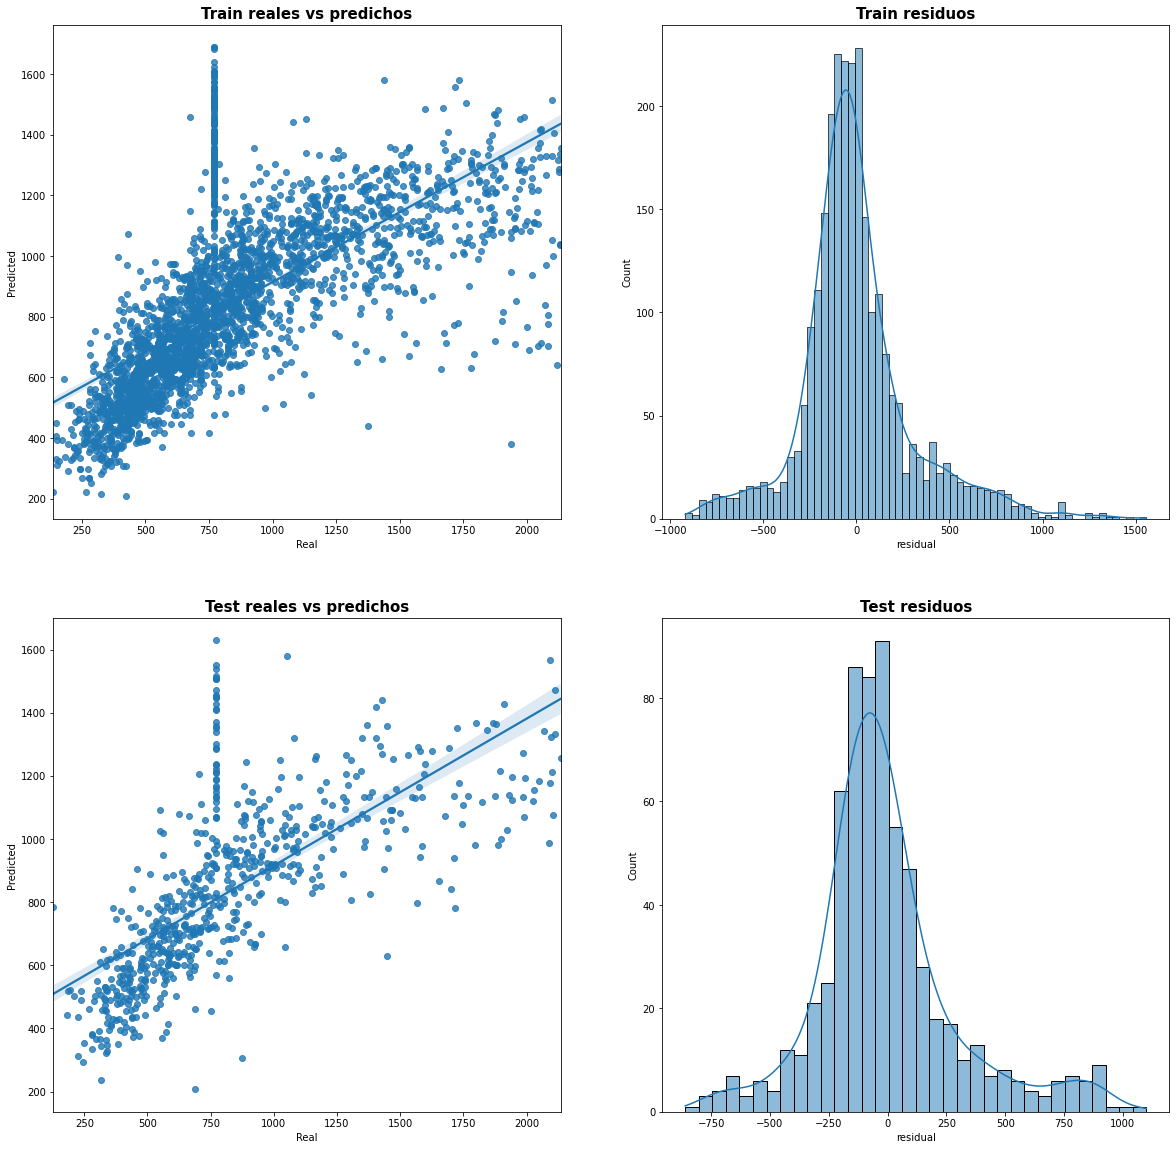

In [19]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

# ploteamos los reales vs los predichos
sns.regplot(data = results[results['Set'] == "Train"], x = "Real", y = "Predicted", ax = ax[0,0])
sns.regplot(data = results[results['Set'] == "Test"], x = "Real", y = "Predicted", ax = ax[1,0])

# ploteamos los residuos
sns.histplot(results[results['Set'] == "Train"], x="residual", kde=True, ax = ax[0,1])
sns.histplot(results[results['Set'] == "Test"], x="residual", kde=True, ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

# Validación del modelo

La finalidad última de un modelo es predecir la variable respuesta en observaciones futuras o en observaciones que el modelo no ha “visto” antes, es decir, los datos que tenemos en el test. El error mostrado por defecto tras entrenar un modelo suele ser el error de entrenamiento, el error que comete el modelo al predecir las observaciones que ya ha “visto”. 

Si bien el análisis de los residuos son útiles para entender cómo está aprendiendo el modelo, no es una estimación realista de cómo se comporta el modelo ante nuevas observaciones. 

Las métricas que usaremos para evaluar lo bueno que es nuestro modelo son: 

- Error medio cuadrado (**MSE**): es quizás la métrica más simple y común para la evaluación de regresión, pero también es probablemente la menos útil. Se define por la ecuación.


    - Se resta la diferencia entre el valor predicho y el valor real y se eleva al cuadrado.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma entre la cantidad de puntos pronosticados.


   ![MSE](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/MSE.png?raw=true)

    Básicamente mide el error cuadrado promedio de nuestras predicciones. Para cada punto, calcula la diferencia cuadrada entre las predicciones y el valor real y luego promedia esos valores.
    
    

- Error cuadrático medio (**RMSE**): es solo la raíz cuadrada de MSE. La raíz cuadrada se introduce para hacer que la escala de los errores sea igual a la escala de los objetivos.


    - Se resta la diferencia entre el valor predicho y el valor real y se eleva al cuadrado.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma entre la cantidad de puntos pronosticados.
    - Se saca la raíz cuadrada del resultado del punto anterior.
    
   ![rmse](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/rmse.jpeg?raw=true)


    Es una media que representa la raíz cuadrada del segundo momento de las diferencias. Entre mayor el resultado mayor es el error y menos preciso el modelo.

- Error absoluto medio (**MAE**): es un promedio de los errores del modelo. Se obtiene un número, un valor alto representa un error alto. 


    - Se resta la diferencia entre el valor predicho y el valor real en cada punto que se pronostica.
    - Se saca el valor absoluto del punto anterior.
    - Se suman todos los resultados del punto anterior.
    - Se divide el valor de la suma entre la cantidad de puntos pronosticados.
    
   ![MAE](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/mae.png?raw=true)
    
    
    Es una medida que tiene un sesgo hacia items de mayor volumen y normalmente es inadecuado para medir ítems con baja demanda


- R cuadrado (**R2**): nos dice qué porcentaje de variación de la variable predictora es explicado por todas las variables predictoras. Oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. 

- R cuadrado ajustado (**R2 ajd**): es lo mismo que el R2, pero en este caso se penalizará cada variable que se incluye en el modelo. 

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2:",  metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 208.84652083569725
Mean Squared Error: 88622.00270972554
Root Mean Squared Error: 297.69447880289204
R2: 0.49781982938107816


Ahora vamos a introducir los conceptos de *overfitting* y *underfitting*. Para hacerlo tendremos que comparar las métricas de evaluación tanto del train como del test. Vamos a ello:  

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))
print("R2:",  metrics.r2_score(y_train, y_pred_train))

Mean Absolute Error: 209.31675579110592
Mean Squared Error: 93319.33115993837
Root Mean Squared Error: 305.4821290352979
R2: 0.4608310040304314


In [22]:
resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_pred), metrics.mean_absolute_error(y_train, y_pred_train)],
                'MSE': [metrics.mean_squared_error(y_test, y_pred), metrics.mean_squared_error(y_train, y_pred_train)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))],
                'R2':  [metrics.r2_score(y_test, y_pred), metrics.r2_score(y_train, y_pred_train)]}

In [23]:
resultados

{'MAE': [208.84652083569725, 209.31675579110592],
 'MSE': [88622.00270972554, 93319.33115993837],
 'RMSE': [297.69447880289204, 305.4821290352979],
 'R2': [0.49781982938107816, 0.4608310040304314]}

In [24]:
df_results = pd.DataFrame(resultados, index = ["test", "train"])
df_results

,MAE,MSE,RMSE,R2
test,208.846521,88622.00271,297.694479,0.497820
train,209.316756,93319.33116,305.482129,0.460831


In [25]:
df_results.style.background_gradient(cmap='coolwarm')


,MAE,MSE,RMSE,R2
test,208.846521,88622.002710,297.694479,0.497820
train,209.316756,93319.331160,305.482129,0.460831


## Cross validation

Lo que hacemos normalmente al entrenar el modelo es pasarle todos los registros del train y que haga el fit(). Con K-Folds en vez de pasarle todos los registros directamente al modelo, haremos así:

Iterar 5 veces:


- Apartaremos 1/5 de muestras.


- Entrenamos al modelo con el restante 4/5 de muestras.


- Mediremos el accuracy obtenido sobre las muestras que habíamos apartado.


- Esto quiere decir que hacemos 5 entrenamientos independientes.


Lo bueno que es nuestro modelo final será el promedio de las 5 metricas anteriores.


![cross](https://github.com/Ironhack-Part-Time-Enero2022/apuntes-clases/blob/master/semana-17/imagenes/cross_val.png?raw=true)


Los principales métodos que tenemos son: 

- `cross_val_score`

- `cross_validate`

> La principal diferencia entre estos dos métodos es que el segundo nos permite testar distintas métricas. 

In [26]:

cv_scores = cross_val_score(
                estimator = LinearRegression(),
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )

print(f"Métricas validación cruzada: {cv_scores}")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Métricas validación cruzada: [-299.66543407 -317.0892     -335.25724416 -291.45808224 -303.69735521]
Média métricas de validación cruzada: -309.43346313651875


In [27]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [28]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error'),
                cv        = 4,
                return_train_score = True
            )

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,train_r2,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.006639,0.002648,0.440878,0.477449,-314.505555,-300.447441
1,0.005199,0.002494,0.510127,0.454564,-285.450137,-309.883825
2,0.004771,0.002640,0.442392,0.476770,-315.947346,-299.811676
3,0.004651,0.002590,0.447102,0.476122,-308.203191,-302.312719


# Otros modelos

A veces nos podemos encontrar con que nuestro modelo de Regresión Lineal no es muy bueno. Para mejorar el modelo, podemos pensar en Tunear sus parámetros y volver a entrenar y probar, podemos intentar obtener más registros, cambiar el preprocesado de datos, limpieza, balanceo de clases, selección de features, generación de features… De hecho, podemos pensar que seleccionamos un mal modelo, y podemos intentar con distintos modelos: de árbol de decisión, redes neuronales, ensambles…

En este apartado veremos otros tipos de modelos de regresión que podemos aplicar en Python

## Decision Tree

Crear un árbol de decisiones es en un proceso de dividir los datos de entrada, este es un procedimiento numérico en el que se alinean todos los valores y se prueban diferentes puntos de división utilizando distintos métodos. Todas las variables de entrada y todos los puntos de división posibles se evalúan y se elige la que tenga mejor resultado.

> A diferencia de los modelos lineales, los árboles de decisiones pueden capturar la interacción no lineal entre las características y el objetivo.

Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

Muchos métodos predictivos generan modelos globales en los que una única ecuación se aplica a todo el espacio muestral. Cuando el caso de uso implica múltiples predictores, que interaccionan entre ellos de forma compleja y no lineal, es muy difícil encontrar un único modelo global que sea capaz de reflejar la relación entre las variables. Los métodos estadísticos y de machine learning basados en árboles engloban a un conjunto de técnicas supervisadas no paramétricas que consiguen segmentar el espacio de los predictores en regiones simples, dentro de las cuales es más sencillo manejar las interacciones. Es esta característica la que les proporciona gran parte de su potencial.

DecisionTreeRegressor tiene por defecto los siguientes hiperparámetros:

- criterion='mse'


- splitter='best'


- max_depth=None


- min_samples_split=2


- min_samples_leaf=1


- min_weight_fraction_leaf=0.0


- max_features=None


- random_state=None


- max_leaf_nodes=None


- min_impurity_decrease=0.0


- min_impurity_split=None


- ccp_alpha=0.0


De entre todos ellos, los más importantes son aquellos que detienen el crecimiento del árbol (condiciones de stop):

- `max_depth`: profundidad máxima que puede alcanzar el árbol.


- `min_samples_split`: número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).


- `min_samples_leaf`: número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento ceil(min_samples_split * n_samples).


- `max_leaf_nodes`: número máximo de nodos terminales.


- `random_state`: semilla para que los resultados sean reproducibles. Tiene que ser un valor entero.



In [29]:
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
rr = RandomForestRegressor()

In [31]:
rr.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
y_pred_forest = rr.predict(X_test)
y_pred_forest

array([ 576.4       ,  708.56      ,  850.84      ,  593.41437751,
        516.16      ,  696.48      ,  906.22      ,  424.71      ,
        512.13      , 1354.41      , 1311.04313253, 1339.99      ,
       1316.02      ,  906.54      ,  704.5       ,  608.45      ,
       1097.69      , 1001.81      ,  760.42      ,  565.1       ,
       1048.2       ,  501.52      ,  868.13437751,  787.06      ,
       1164.79      ,  543.2       ,  808.39      ,  787.3       ,
        711.72      ,  914.62437751,  641.28      ,  495.92      ,
        812.46      , 1249.77      , 1008.23437751,  988.83      ,
        469.53      ,  995.09      ,  603.82      ,  345.45      ,
        895.94      ,  614.9       ,  572.58      ,  570.23      ,
       1238.49      ,  444.04      , 1309.19      ,  614.62      ,
       1086.56      ,  739.47      ,  327.02      ,  434.36      ,
        447.78      ,  918.18      , 1344.15      , 1200.4       ,
        600.5       , 1329.12      , 1158.54      ,  418.75   